In [213]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [214]:
# Dataset prepration

In [215]:
X,y=make_blobs(n_samples=500,centers=5,random_state=3)

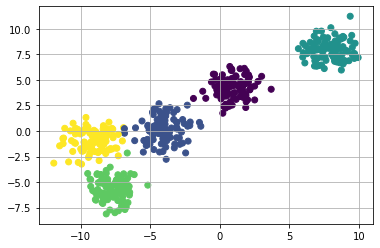

In [216]:
plt.figure(0)
plt.grid(True)
plt.scatter(X[:,0],X[:,1],c=y)
plt.show()

In [251]:
k=5

color=['green','red','blue','yellow','orange']

clusters={}

for i in range(k):
    center=(2*np.random.random((X.shape[1],)))
    points=[]
    
    cluster={
                'center':center,
                'points':points,
                'color':color[i]
            }
    
    clusters[i]=cluster
    

In [252]:
#center=10*(2*np.random.random((X.shape[1],)))
#print(center)

In [253]:
 clusters

{0: {'center': array([0.2081985 , 0.63418232]),
  'points': [],
  'color': 'green'},
 1: {'center': array([0.26981559, 1.85178503]), 'points': [], 'color': 'red'},
 2: {'center': array([0.34995705, 0.02522196]), 'points': [], 'color': 'blue'},
 3: {'center': array([1.28703089, 0.42534823]),
  'points': [],
  'color': 'yellow'},
 4: {'center': array([1.68872187, 0.7193639 ]),
  'points': [],
  'color': 'orange'}}

In [254]:
def distance(v1,v2):
    return np.sqrt(np.sum((v1-v2)**2))

In [255]:
#v1=np.array([1,2])
#v2=np.array([3,5])
#distance(v1,v2)
for ix in range(X.shape[0]):
        dist=[]
        curr_x=X[ix]
    
        for kx in range(k):
            d=distance(curr_x,clusters[kx]['center'])
            dist.append(d)
    
        current_cluster=np.argmin(dist)
    
        clusters[current_cluster]['points'].append(curr_x)

In [256]:
def assignPointToClusters(clusturs): #E-Stap
    for ix in range(X.shape[0]):
        dist=[]
        curr_x=X[ix]
    
        for kx in range(k):
            d=distance(curr_x,clusters[kx]['center'])
            dist.append(d)
    
        current_cluster=np.argmin(dist)
    
        clusters[current_cluster]['points'].append(curr_x)
    
def updateClusters(clusturs): # M-Stap -> We update every clustur center according to the mean
    for kx in range(k):
        pts=np.array(clusters[kx]['points'])
        
        if pts.shape[0]>0:
            new_u=pts.mean(axis=0)
            clusters[kx]['center']=new_u
            clusters[kx]['points']=[] #clear the list
            

def plotClusters(clusturs):
    for kx in range(k):
        #print(len(clusters[kx]['points']))
        pts=np.array(clusters[kx]['points'])
       # print(pts.shape)
        #plot the points
        try:
            plt.scatter(pts[:,0],pts[:,1])
        except:
            pass
        
        #Plot the clustur center
        uk=clusters[kx]['center']
        plt.scatter(uk[0],uk[1],color='black',marker='*')

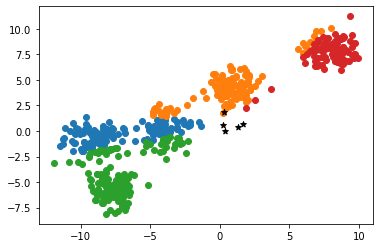

In [257]:
plotClusters(clusters)

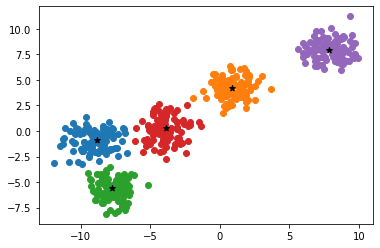

In [262]:
assignPointToClusters(clusters)
plotClusters(clusters)
updateClusters(clusters)
